In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from collections import Counter


In [124]:
asm_folder_path = 'trainASM' 

In [125]:
def clean_asm_file(input_filepath, output_filepath):
    with open(input_filepath, 'r', encoding='ISO-8859-1') as file:
        lines = file.readlines()

    cleaned_lines = []

    # Patterns to identify unnecessary sections or metadata
    section_skip_pattern = re.compile(r'^section\s\.(idata|edata|rsrc|bss)$')
    unwanted_patterns = [
        re.compile(r';.*'),  # Comments
        re.compile(r'^\s*$'),  # Empty lines
        re.compile(r'^\s*\d+\s+')  # Line numbers or addresses
    ]

    # Flag to indicate if we are in a skippable section
    skip_section = False

    for line in lines:
        line = line.strip()

        # Check if the line indicates the beginning of a new section
        section_match = section_skip_pattern.match(line)
        if section_match:
            skip_section = True
            continue

        if line.startswith('section'):
            skip_section = False  # Reset on new section

        if skip_section:
            continue

        # Apply all unwanted pattern checks
        if any(pat.search(line) for pat in unwanted_patterns):
            continue

        # Standardize hexadecimal values to lowercase
        line = re.sub(r'0x[0-9A-F]+', lambda match: match.group(0).lower(), line)

        cleaned_lines.append(line)

    with open(output_filepath, 'w', encoding='ISO-8859-1') as file:
        file.write('\n'.join(cleaned_lines))


In [126]:
def process_directory(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith('.asm'):
            input_filepath = os.path.join(input_dir, filename)
            output_filepath = os.path.join(output_dir, filename.replace('.asm', '.asm'))
            clean_asm_file(input_filepath, output_filepath)


In [8]:
input_dir = asm_folder_path  
output_dir = 'output'  
process_directory(input_dir, output_dir)

KeyboardInterrupt: 

In [127]:
# Lists of items to search for in the assembly files
prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:', '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'ret', 'nop', 'sub', 'inc', 'dec', 'add', 'imul', 'xchg', 'or', 'shr', 'cmp', 'call']
registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']



In [128]:
def extract_features_from_asm_file(filepath):
    with open(filepath, 'r', encoding='ISO-8859-1') as file:
        content = file.read().lower()  # Read the file content and convert to lowercase

    # Initialize counters
    prefix_counts = Counter({p: content.count(p.lower()) for p in prefixes})
    opcode_counts = Counter({o: content.count(o + ' ') for o in opcodes})  # Search for opcodes followed by a space
    register_counts = Counter({r: content.count(r) for r in registers})

    # Prepare the row for this file
    features = {**prefix_counts, **opcode_counts, **register_counts}
    features['Filename'] = os.path.basename(filepath)
    return features

def process_asm_files1(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.asm'):
            filepath = os.path.join(directory, filename)
            features = extract_features_from_asm_file(filepath)
            data.append(features)
    return pd.DataFrame(data)

In [129]:
directory = 'output' 
df_features = process_asm_files1(directory)

In [130]:
features_asm_df = df_features.copy()
features_asm_df.to_csv('features_asm.csv') # runnnnnnnnnnnnnnn

In [131]:
features_asm_df

,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,.tls:,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,Filename
0,7,18717,0,253,688307,0,1223,0,0,0,...,1491,1903,4366,800,2316,1285,581,688,0,01azqd4InC7m9JpocGv5.asm
1,0,103812,0,214,11197,0,11720,0,0,0,...,713,481,1398,254,1063,383,904,415,0,01IsoiSMh5gxyDYTl4CB.asm
2,7,68554,0,123,439,0,588,0,0,0,...,524,4,942,5,546,7,451,56,0,01jsnpXSAlgw6aPeDxrU.asm
3,8,568,0,28,33,0,155,0,1,0,...,20,31,125,17,64,13,41,79,0,01kcPWA9K2BOxQeS5Rju.asm
4,7,8851,0,76,2058,76,0,0,1,0,...,1037,24,1129,18,1144,24,1545,107,0,01SuzwMJEIXsK7A8dQbl.asm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,7,3174,0,88,1268,0,2644,2,1,0,...,316,505,651,346,316,310,349,39,0,Hc5LqZVK2yzlsb8BEfdO.asm
838,8,5427,0,131,8918,0,330,0,1,0,...,459,298,1310,246,668,450,1332,383,0,hrguW0CqMt2mJdfvX8IB.asm
839,7,0,0,82,0,0,10,0,1,6,...,89,48,183,60,74,15,93,44,0,hZiVAw5nREjHU1qodatK.asm
840,7,3037,0,62,1885,0,4589,0,1,0,...,224,589,667,271,238,227,380,61,0,i8WIr0dtVHSGMmwFlcUY.asm


In [132]:
trainLabels = pd.read_csv('trainLabelslast.csv')
df_features_3_labelled = pd.merge(features_asm_df, trainLabels[['Filename', 'Class']], on='Filename', how='left')

In [133]:
df_features_3_labelled

,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,.tls:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Filename,Class
0,7,18717,0,253,688307,0,1223,0,0,0,...,1903,4366,800,2316,1285,581,688,0,01azqd4InC7m9JpocGv5.asm,9
1,0,103812,0,214,11197,0,11720,0,0,0,...,481,1398,254,1063,383,904,415,0,01IsoiSMh5gxyDYTl4CB.asm,2
2,7,68554,0,123,439,0,588,0,0,0,...,4,942,5,546,7,451,56,0,01jsnpXSAlgw6aPeDxrU.asm,9
3,8,568,0,28,33,0,155,0,1,0,...,31,125,17,64,13,41,79,0,01kcPWA9K2BOxQeS5Rju.asm,1
4,7,8851,0,76,2058,76,0,0,1,0,...,24,1129,18,1144,24,1545,107,0,01SuzwMJEIXsK7A8dQbl.asm,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,7,3174,0,88,1268,0,2644,2,1,0,...,505,651,346,316,310,349,39,0,Hc5LqZVK2yzlsb8BEfdO.asm,5
838,8,5427,0,131,8918,0,330,0,1,0,...,298,1310,246,668,450,1332,383,0,hrguW0CqMt2mJdfvX8IB.asm,5
839,7,0,0,82,0,0,10,0,1,6,...,48,183,60,74,15,93,44,0,hZiVAw5nREjHU1qodatK.asm,5
840,7,3037,0,62,1885,0,4589,0,1,0,...,589,667,271,238,227,380,61,0,i8WIr0dtVHSGMmwFlcUY.asm,5


In [134]:
from sklearn.model_selection import train_test_split

def split_data(data, classes):
    features = data.drop(columns=[classes,"Filename"])
    labels = data[classes]
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 
    return X_train, X_val, X_test, y_train, y_val, y_test

In [135]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df_features_3_labelled, 'Class')


In [136]:
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (504, 40)
Validation Data Shape: (169, 40)
Test Data Shape: (169, 40)


In [137]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

def apply_pca(data, n_components=0.95):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_scaled)
    return pd.DataFrame(principal_components)

In [138]:
def feature_importance_selection(data, labels):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    # model.fit(data, labels)
    
    # Using SelectFromModel to select features based on importance
    selector = SelectFromModel(model)
    selector.fit(data, labels)          
    selected_features = selector.transform(data)
    X_transformed = selector.transform(data)
    return pd.DataFrame(selected_features, columns=data.columns[selector.get_support()])

In [139]:
df = features_asm_df.drop("Filename", axis=1)
df

,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,.tls:,...,call,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip
0,7,18717,0,253,688307,0,1223,0,0,0,...,1533,1491,1903,4366,800,2316,1285,581,688,0
1,0,103812,0,214,11197,0,11720,0,0,0,...,225,713,481,1398,254,1063,383,904,415,0
2,7,68554,0,123,439,0,588,0,0,0,...,125,524,4,942,5,546,7,451,56,0
3,8,568,0,28,33,0,155,0,1,0,...,32,20,31,125,17,64,13,41,79,0
4,7,8851,0,76,2058,76,0,0,1,0,...,194,1037,24,1129,18,1144,24,1545,107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,7,3174,0,88,1268,0,2644,2,1,0,...,94,316,505,651,346,316,310,349,39,0
838,8,5427,0,131,8918,0,330,0,1,0,...,398,459,298,1310,246,668,450,1332,383,0
839,7,0,0,82,0,0,10,0,1,6,...,27,89,48,183,60,74,15,93,44,0
840,7,3037,0,62,1885,0,4589,0,1,0,...,104,224,589,667,271,238,227,380,61,0


In [140]:
pca_data = apply_pca(df)

In [141]:
pca_data 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.442556,-0.634021,-0.332702,0.992319,-0.315812,-1.431295,1.876618,-4.549877,2.098310,1.138370,0.256186,-0.144326,-0.644456,0.081316,-2.045290,-0.104957,1.240183,-0.562470,0.148261
1,-0.284341,0.468764,-0.262588,-0.959961,1.250839,-0.638457,0.071166,0.071967,-0.030178,0.012547,0.006922,-0.010011,0.004777,0.015435,0.148566,0.442183,-0.062742,0.115606,-1.971369
2,-0.885409,0.029918,-0.134954,0.165083,-0.132271,-0.068494,0.136255,0.239289,-0.039574,0.026176,0.014487,-0.003678,0.001388,-0.003606,0.466260,0.071592,-0.128896,0.201723,-0.129337
3,-1.432605,-0.084961,-0.111730,0.156776,-0.476395,0.256342,0.102642,0.215625,-0.047196,0.035275,0.024239,-0.004668,-0.004624,0.002297,0.479374,-0.032184,-0.124883,-0.031699,0.320253
4,-0.846624,-0.201130,0.038534,0.088451,-0.249662,0.144470,-0.122759,0.135796,-0.086481,0.062081,0.050557,0.011626,-0.174528,0.176770,0.306704,0.036760,0.167003,0.110957,0.030705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,-0.979498,-0.113213,-0.126052,0.058658,-0.217666,0.058620,-0.010661,0.119944,-0.042766,0.033587,0.000415,0.003200,-0.001244,0.012972,0.344152,0.020409,-0.236929,0.066811,-0.006050
838,-0.627323,-0.345673,-0.131633,0.400508,-0.242556,0.080771,-0.153299,0.019665,-0.041390,0.038823,0.011329,0.000969,-0.016031,0.047608,0.258637,-0.040908,-0.393894,0.179346,0.195019
839,-1.351966,-0.044836,-0.138213,0.098180,-0.206051,0.108414,0.060752,0.184158,-0.043557,0.026230,0.019595,-0.005781,0.005994,0.013001,0.397050,0.018501,-0.188236,0.079016,0.035707
840,-0.998814,-0.133006,-0.124091,0.013360,-0.224322,0.125529,-0.016467,0.100616,-0.041782,0.031009,0.016082,-0.006203,0.009033,0.008016,0.351422,0.022563,-0.238720,-0.023667,0.019842


In [142]:
important_features_data = feature_importance_selection(df, df_features_3_labelled["Class"])



#important_features_data = feature_importance_selection(df_features_3.loc[:, df_features_3.columns != 'Filename'], df_features_3_labelled["Class"])

In [143]:
important_features_data

,HEADER:,.text:,.idata:,.data:,.rdata:,.rsrc:,.tls:,mov,push,pop,...,shr,cmp,call,esi,eax,ebx,ecx,edi,ebp,esp
0,7,18717,253,688307,1223,0,0,5157,2555,542,...,2,672,1533,1903,4366,800,2316,1285,581,688
1,0,103812,214,11197,11720,0,0,2187,249,186,...,14,218,225,481,1398,254,1063,383,904,415
2,7,68554,123,439,588,0,0,31,436,70,...,0,127,125,4,942,5,546,7,451,56
3,8,568,28,33,155,1,0,86,60,19,...,0,15,32,31,125,17,64,13,41,79
4,7,8851,76,2058,0,1,0,2535,143,40,...,0,182,194,24,1129,18,1144,24,1545,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,7,3174,88,1268,2644,1,0,826,363,140,...,27,27,94,505,651,346,316,310,349,39
838,8,5427,131,8918,330,1,0,1306,1224,349,...,11,149,398,298,1310,246,668,450,1332,383
839,7,0,82,0,10,1,6,169,79,63,...,1,24,27,48,183,60,74,15,93,44
840,7,3037,62,1885,4589,1,0,720,396,128,...,19,29,104,589,667,271,238,227,380,61


In [144]:
important_features_data.isna().sum()

HEADER:    0
.text:     0
.idata:    0
.data:     0
.rdata:    0
.rsrc:     0
.tls:      0
mov        0
push       0
pop        0
sub        0
inc        0
xchg       0
or         0
shr        0
cmp        0
call       0
esi        0
eax        0
ebx        0
ecx        0
edi        0
ebp        0
esp        0
dtype: int64

In [145]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression


In [146]:

def train_knn(X_train, y_train):
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    knn = KNeighborsClassifier()
    knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy')
    knn_grid.fit(X_train, y_train)
    return knn_grid.best_estimator_


In [151]:

def train_random_forest(X_train, y_train):
    # Hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [None, 10, 20, 30],
        'bootstrap': [True, False]
    }
    rf = RandomForestClassifier(random_state=42)
    rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
    rf_grid.fit(X_train, y_train)
    return rf_grid.best_estimator_


In [ ]:


def train_xgboost(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'subsample': [0.9, 1.0]
    }
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
    xgb_grid.fit(X_train, y_train)
    return xgb_grid.best_estimator_



In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from tqdm.auto import tqdm
from tqdm.sklearn import TqdmCallback

def train_logistic_regression(X_train, y_train):
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    logistic = LogisticRegression(max_iter=10000)
    logistic_grid = GridSearchCV(
        estimator=logistic,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=0
    )
    # Using TqdmCallback to show progress
    with tqdm(total=len(param_grid['C']) * len(param_grid['penalty']) * len(param_grid['solver']) * 3,  # Total iterations
              desc="Training Logistic Regression", unit="iteration") as pbar:
        logistic_grid.fit(X_train, y_train, callback=TqdmCallback(pbar))
    return logistic_grid.best_estimator_


In [147]:
# Load your data
labels = df_features_3_labelled["Class"]
X, y = important_features_data, labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [148]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(673, 24)
(673,)
(169, 24)
(169,)


In [149]:
# Train Random Forest and SVM
best_knn = train_knn(X_train, y_train)


In [152]:
best_rf = train_random_forest(X_train, y_train)


In [155]:
best_xgboost = train_xgboost(X_train, y_train-1)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9
[CV 1/3; 1/24] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9;, score=0.973 total time=   3.7s
[CV 2/3; 1/24] START learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9
[CV 2/3; 1/24] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9;, score=0.946 total time=   1.7s
[CV 3/3; 1/24] START learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9
[CV 3/3; 1/24] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9;, score=0.964 total time=   2.0s
[CV 1/3; 2/24] START learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0
[CV 1/3; 2/24] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0;, score=0.969 total time=   1.9s
[CV 2/3; 2/24] START learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0
[CV 2/3; 2/24] END learning_rate=0.1, max_depth=3,

In [162]:
best_logistic_regression =  train_logistic_regression(X_train, y_train)

C:\Users\youse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\youse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\youse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\youse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The

In [163]:
# Evaluate models
print("KNN Classification Report:")
print(classification_report(y_test, best_knn.predict(X_test)))
print("Random forest Classification Report:")
print(classification_report(y_test, best_rf.predict(X_test)))
print("XGboost Classification Report:")
print(classification_report(y_test-1, best_xgboost.predict(X_test)))
print("Logistic regression Classification Report:")
print(classification_report(y_test, best_logistic_regression.predict(X_test)))

KNN Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.94      0.87        18
           2       0.91      0.83      0.87        24
           3       0.95      0.95      0.95        22
           4       0.95      0.86      0.90        21
           5       1.00      0.80      0.89        10
           6       0.88      0.95      0.91        22
           7       0.91      1.00      0.95        21
           8       0.93      0.87      0.90        15
           9       0.94      0.94      0.94        16

    accuracy                           0.91       169
   macro avg       0.92      0.91      0.91       169
weighted avg       0.92      0.91      0.91       169

Random forest Classification Report:
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        24
           3       1.00      0.95      0.98        22
           4  

In [2]:
import pandas as pd

# Define the data
data = {
    "Algorithm": ["KNN", "Random Forest", "XGBoost", "Logistic Regression"],
    "Average Precision": [0.91, 0.98, 0.97, 0.94],
    "Average Recall": [0.91, 0.97, 0.97, 0.93],
    "Average F1-Score": [0.91, 0.97, 0.97, 0.94],
    "Accuracy": [0.91, 0.98, 0.98, 0.95]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
import ace_tools as tools; 
tools.display_dataframe_to_user(name="Classification Performance Summary", dataframe=df)

# Print the DataFrame to the console
print(df)


ModuleNotFoundError: No module named 'ace_tools'

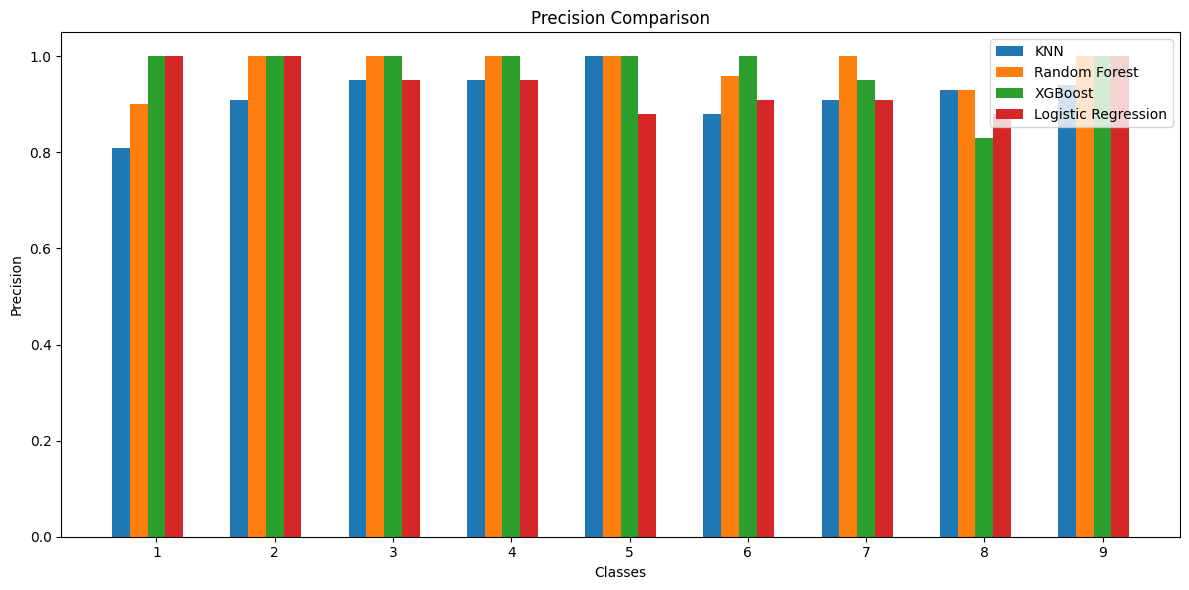

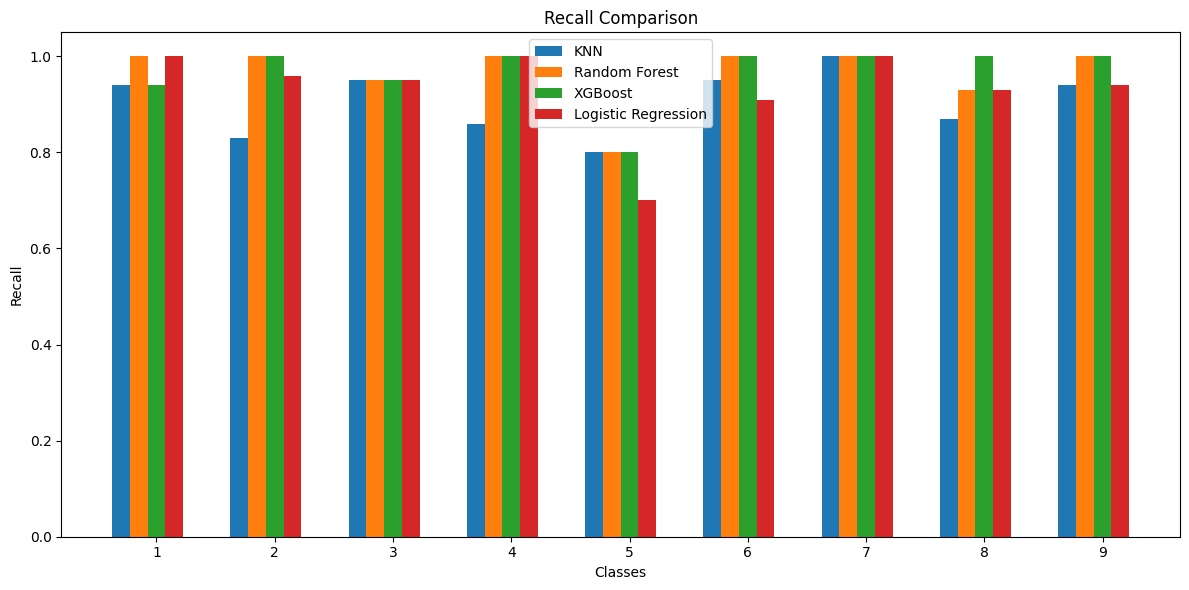

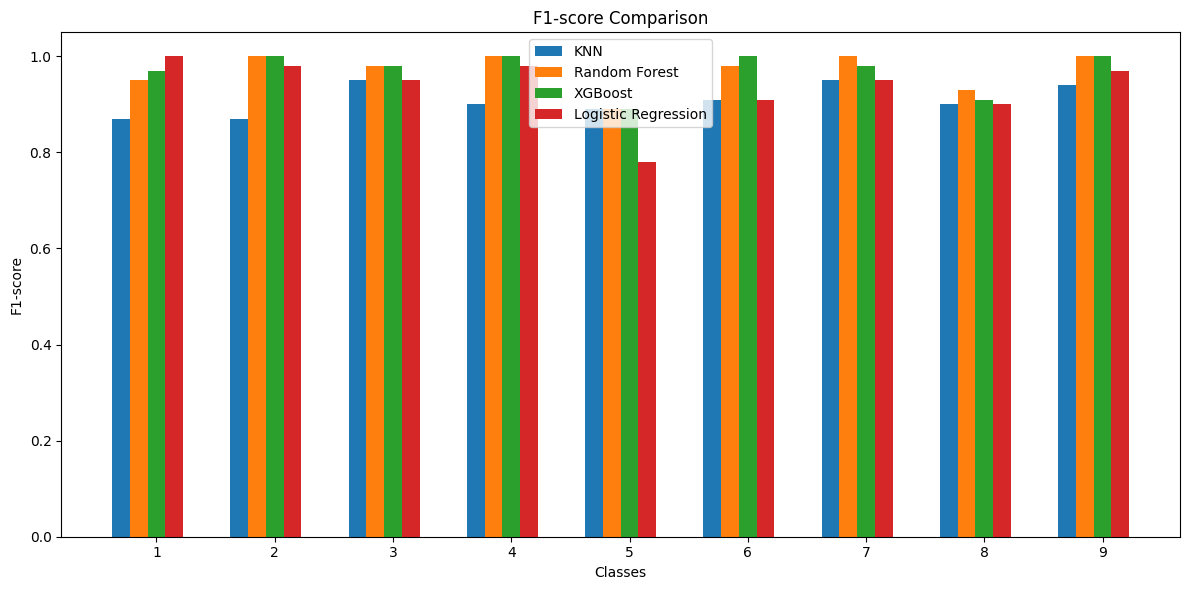

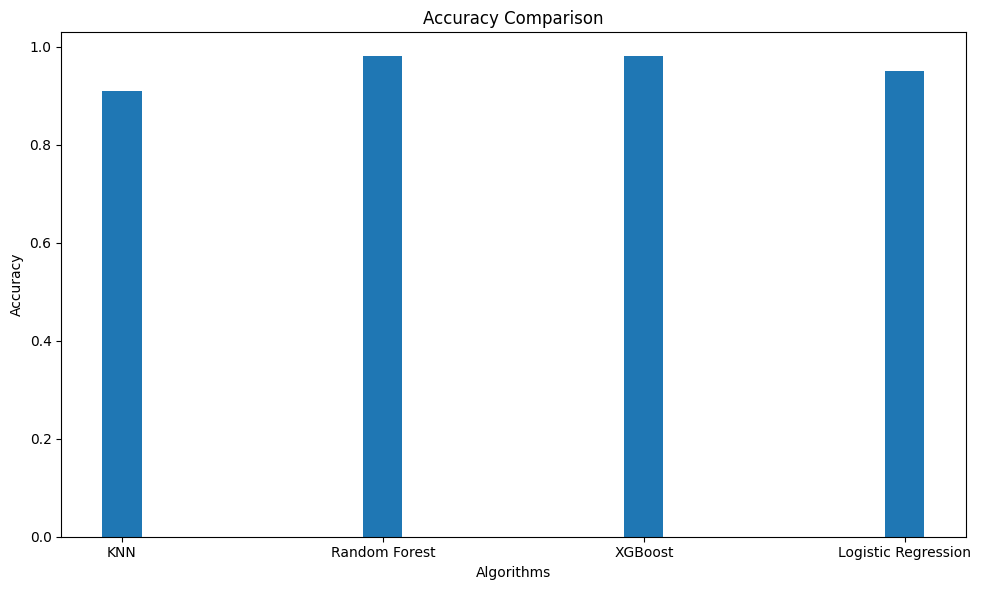

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
algorithms = ['KNN', 'Random Forest', 'XGBoost', 'Logistic Regression',]

# Precision, recall, f1-score for each class and algorithm
precision = [
    [0.81, 0.91, 0.95, 0.95, 1.00, 0.88, 0.91, 0.93, 0.94],  # KNN
    [0.90, 1.00, 1.00, 1.00, 1.00, 0.96, 1.00, 0.93, 1.00],  # Random Forest
    [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.95, 0.83, 1.00],  # XGBoost
    [1.00, 1.00, 0.95, 0.95, 0.88, 0.91, 0.91, 0.88, 1.00]  # Logistic Regression
]

recall = [
    [0.94, 0.83, 0.95, 0.86, 0.80, 0.95, 1.00, 0.87, 0.94],  # KNN
    [1.00, 1.00, 0.95, 1.00, 0.80, 1.00, 1.00, 0.93, 1.00],  # Random Forest
    [0.94, 1.00, 0.95, 1.00, 0.80, 1.00, 1.00, 1.00, 1.00],  # XGBoost
    [1.00, 0.96, 0.95, 1.00, 0.70, 0.91, 1.00, 0.93, 0.94]  # Logistic Regression
]

f1_score = [
    [0.87, 0.87, 0.95, 0.90, 0.89, 0.91, 0.95, 0.90, 0.94],  # KNN
    [0.95, 1.00, 0.98, 1.00, 0.89, 0.98, 1.00, 0.93, 1.00],  # Random Forest
    [0.97, 1.00, 0.98, 1.00, 0.89, 1.00, 0.98, 0.91, 1.00],  # XGBoost
    [1.00, 0.98, 0.95, 0.98, 0.78, 0.91, 0.95, 0.90, 0.97]  # Logistic Regression
]

# Accuracy for each algorithm, including 
accuracy = [0.91, 0.98, 0.98, 0.95]

# Convert the data to numpy arrays for easier handling
precision = np.array(precision)
recall = np.array(recall)
f1_score = np.array(f1_score)

# Define bar width and positions
bar_width = 0.15  # Adjusted to fit one more algorithm
positions = np.arange(len(classes))

# Plot precision
plt.figure(figsize=(12, 6))
for i, algo in enumerate(algorithms):
    plt.bar(positions + i * bar_width, precision[i], width=bar_width, label=algo)
plt.xticks(positions + bar_width * 2, classes)  # Adjusted to center x-ticks
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('photosresult/precision_comparison.png')
plt.show()
plt.close()

# Plot recall
plt.figure(figsize=(12, 6))
for i, algo in enumerate(algorithms):
    plt.bar(positions + i * bar_width, recall[i], width=bar_width, label=algo)
plt.xticks(positions + bar_width * 2, classes)  # Adjusted to center x-ticks
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('photosresult/recall_comparison.png')
plt.show()
plt.close()

# Plot f1-score
plt.figure(figsize=(12, 6))
for i, algo in enumerate(algorithms):
    plt.bar(positions + i * bar_width, f1_score[i], width=bar_width, label=algo)
plt.xticks(positions + bar_width * 2, classes)  # Adjusted to center x-ticks
plt.xlabel('Classes')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('photosresult/f1score_comparison.png')
plt.show()
plt.close()

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(algorithms)), accuracy, width=bar_width, tick_label=algorithms)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.tight_layout()
plt.savefig('photosresult/accuracy_comparison.png')
plt.show()
plt.close()
